In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [4]:
x_train=pd.read_csv('Logistic_X_Train.csv')
y_train=pd.read_csv('Logistic_Y_Train.csv')
x_test=pd.read_csv('Logistic_X_Test.csv')
class_0=x_train.loc[(y_train['label']==0)]
class_1=x_train.loc[(y_train['label']==1)]
print(x_train,x_train.shape,type(x_train),y_train.shape,type(y_train))

            f1        f2        f3
0    -1.239375  0.749101 -0.528515
1    -1.036070  0.801436 -1.283712
2    -0.615579  1.579521 -1.391927
3     1.335978  1.348651  1.433564
4     0.658925  1.300019  0.571603
5     0.656532  0.991440  0.870280
6     1.453978  0.583741  1.277378
7     1.124756  1.116124  1.442579
8    -1.723841 -0.175289 -0.588835
9    -0.794138  1.958963 -0.270497
10    0.242729  0.392831  0.742420
11    0.695879  0.044684  1.410398
12   -1.398345 -0.219578 -1.332539
13    1.699869  1.150703  1.615616
14   -0.975111  0.387796 -1.853479
15    0.732504  0.508059  0.999695
16    1.436570  1.143266  1.556413
17   -0.691339 -0.157180 -0.174195
18   -1.101760  0.734979 -0.974743
19    1.171287  1.676785  1.065021
20   -0.260585 -0.554336  1.303118
21    0.333436  1.652449 -2.442149
22    0.874872  0.470826  1.016199
23    3.138675  2.813416  2.450989
24    0.896895  0.979822  1.162162
25    1.974405  3.124937  1.107507
26    0.669025  0.999672  0.955418
27    2.875423  3.27

In [7]:
#Training the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
coeff=model.coef_
intercept=model.intercept_
print(coeff,intercept)

[[-3.68470635  2.8811019  -2.24745975]] [-3.84066701]


C:\Users\VINAYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VINAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#Testing the model
my_output=model.predict(x_test)
class_0_pred=x_test.loc[(my_output==0)]
class_1_pred=x_test.loc[(my_output==1)]
df=pd.DataFrame(my_output)
print('The classification of chemicals is:')
df

The classification of chemicals is:


,0
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,0


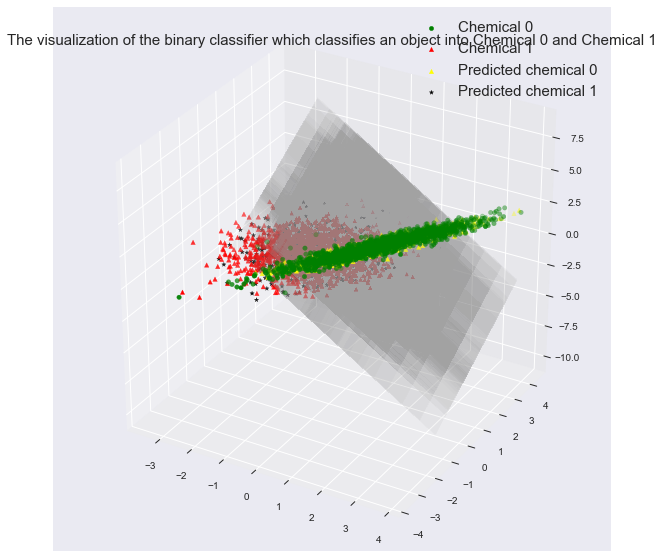

In [14]:
#Visualization of the model
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
ax.scatter3D(class_0['f1'],class_0['f2'],class_0['f3'],label='Chemical 0',color='green')
ax.scatter3D(class_1['f1'],class_1['f2'],class_1['f3'],label='Chemical 1',marker='^',color='red')
x=x_test['f1']
y=x_test['f2']
xx, yy = np.meshgrid(x, y)
z=-((coeff[0][1]*yy+coeff[0][0]*xx+intercept)/coeff[0][2])
ax.plot_surface(xx,yy,z,alpha=0.02,color='w')
ax.scatter3D(class_0_pred['f1'],class_0_pred['f2'],class_0_pred['f3'],marker='^',label='Predicted chemical 0',color='yellow')
ax.scatter3D(class_1_pred['f1'],class_1_pred['f2'],class_1_pred['f3'],marker='*',label='Predicted chemical 1',color='black')
plt.title('The visualization of the binary classifier which classifies an object into Chemical 0 and Chemical 1',fontsize=15)
ax.legend(fontsize=15)

In [12]:
#Accuracy
print('The accuracy of the model is',model.score(x_train,y_train))

The accuracy of the model is 0.995
